<a href="https://colab.research.google.com/github/tejaswi568/AICTE-internship-/blob/main/waste_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kagglehub tensorflow protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madapathitejaswi","key":"b0c76fc1b53f4178b7a6b4f2f550dbed"}'}

In [ ]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)

!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d techsash/waste-classification-data


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 95% 405M/427M [00:00<00:00, 439MB/s]
100% 427M/427M [00:00<00:00, 498MB/s]


In [ ]:
!unzip waste-classification-data.zip -d waste_data


Streaming output truncated to the last 5000 lines.
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: waste_data/dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: waste_data/dataset/DATASE

In [ ]:
train_path = "/content/waste_data/DATASET/TRAIN"
test_path = "/content/waste_data/DATASET/TEST"

print("Train dir exists:", os.path.exists(train_path))
print("Test dir exists:", os.path.exists(test_path))


Train dir exists: True
Test dir exists: True


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,186 (84.86 MB)

 Trainable params: 22,245,186 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    color_mode='rgb'
)


Found 22564 images belonging to 2 classes.


In [ ]:
batch_size = 16


In [ ]:
num_classes = train_generator.num_classes

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=3
)

Epoch 1/3
706/706 ━━━━━━━━━━━━━━━━━━━━ 734s 1s/step - accuracy: 0.7654 - loss: 0.5158 - val_accuracy: 0.8472 - val_loss: 0.3666
Epoch 2/3
706/706 ━━━━━━━━━━━━━━━━━━━━ 718s 1s/step - accuracy: 0.8490 - loss: 0.3604 - val_accuracy: 0.8997 - val_loss: 0.2650
Epoch 3/3
706/706 ━━━━━━━━━━━━━━━━━━━━ 718s 1s/step - accuracy: 0.8631 - loss: 0.3345 - val_accuracy: 0.8834 - val_loss: 0.2964


In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 313ms/step - accuracy: 0.8799 - loss: 0.3062
Test Loss: 0.2964226305484772
Test Accuracy: 0.8834062814712524


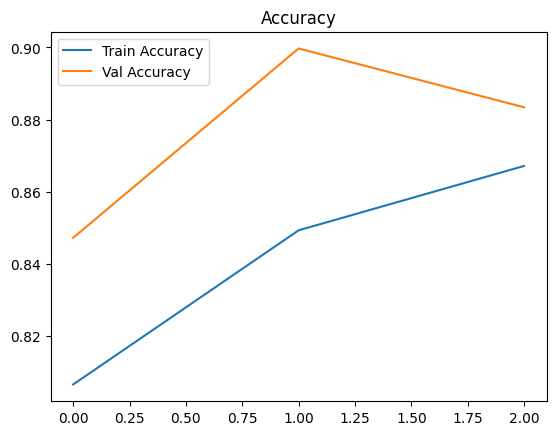

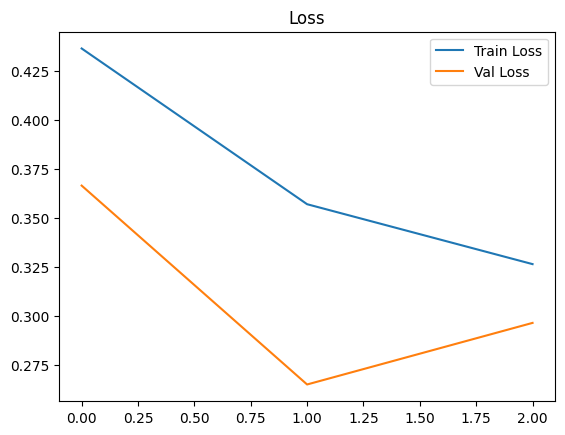

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()


In [ ]:
model.save("waste_classifier_cnn.h5")


In [ ]:
import os

base = "/content/waste_data/DATASET/TEST"
print("Folders:", os.listdir(base))


Folders: ['R', 'O']


In [ ]:
import os

path = "/content/waste_data/DATASET/TEST/O"
print(os.listdir(path))


['O_12738.jpg', 'O_13297.jpg', 'O_13221.jpg', 'O_12823.jpg', 'O_13628.jpg', 'O_13472.jpg', 'O_12978.jpg', 'O_13127.jpg', 'O_12887.jpg', 'O_13014.jpg', 'O_13013.jpg', 'O_12839.jpg', 'O_13950.jpg', 'O_13883.jpg', 'O_13030.jpg', 'O_13563.jpg', 'O_13209.jpg', 'O_13070.jpg', 'O_12913.jpg', 'O_13541.jpg', 'O_13840.jpg', 'O_13377.jpg', 'O_13392.jpg', 'O_12907.jpg', 'O_13319.jpg', 'O_13047.jpg', 'O_12832.jpg', 'O_13558.jpg', 'O_13379.jpg', 'O_12800.jpg', 'O_12896.jpg', 'O_13107.jpg', 'O_12835.jpg', 'O_13872.jpg', 'O_13688.jpg', 'O_13548.jpg', 'O_13851.jpg', 'O_12622.jpg', 'O_13771.jpg', 'O_13938.jpg', 'O_13462.jpg', 'O_13145.jpg', 'O_13461.jpg', 'O_13449.jpg', 'O_13957.jpg', 'O_13924.jpg', 'O_12867.jpg', 'O_12805.jpg', 'O_13170.jpg', 'O_13081.jpg', 'O_13637.jpg', 'O_12778.jpg', 'O_13341.jpg', 'O_12606.jpg', 'O_13724.jpg', 'O_12807.jpg', 'O_13577.jpg', 'O_13343.jpg', 'O_13626.jpg', 'O_12825.jpg', 'O_12983.jpg', 'O_13857.jpg', 'O_12806.jpg', 'O_13502.jpg', 'O_12813.jpg', 'O_13225.jpg', 'O_13720.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = "/content/waste_data/DATASET/TEST/O/O_13297.jpg"

img = load_img(img_path, target_size=(128, 128))  # Use 128x128 NOT 224x224
img = img_to_array(img) / 255.0
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
class_index = np.argmax(pred)
class_labels = list(train_generator.class_indices.keys())

print("Predicted class:", class_labels[class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted class: O


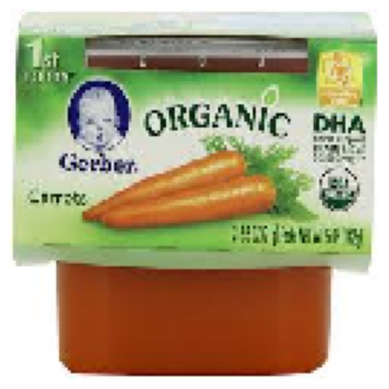

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Image: O_12738.jpg -> Predicted class: O


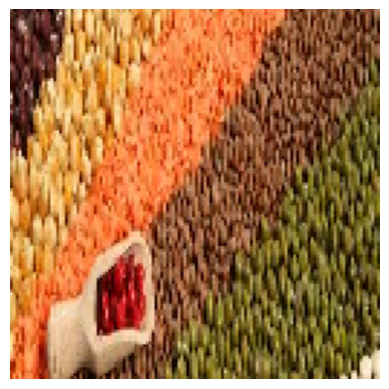

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Image: O_13297.jpg -> Predicted class: O


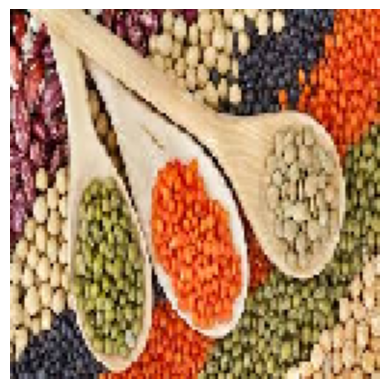

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Image: O_13221.jpg -> Predicted class: O


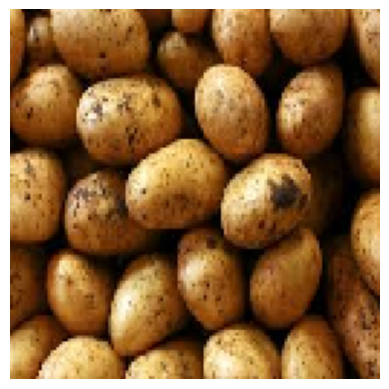

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Image: O_12823.jpg -> Predicted class: O


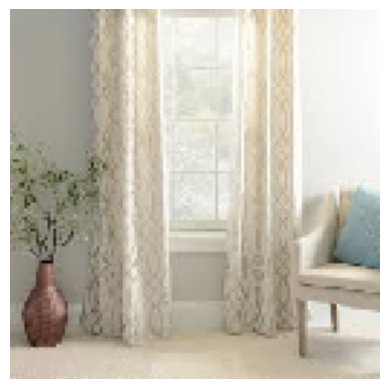

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Image: R_10360.jpg -> Predicted class: R


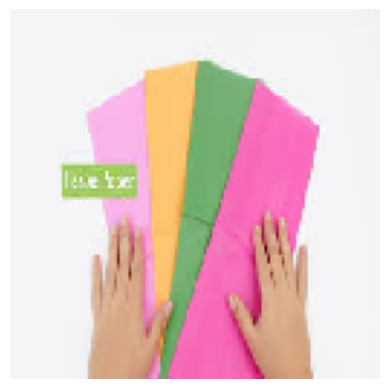

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Image: R_10836.jpg -> Predicted class: O


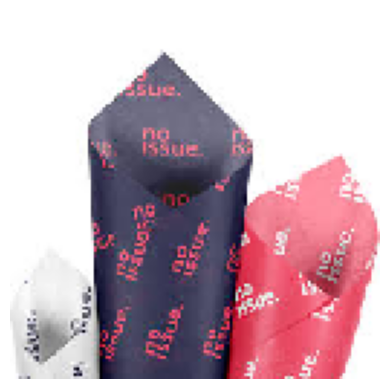

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Image: R_11043.jpg -> Predicted class: R


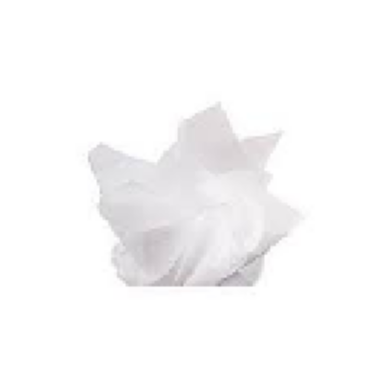

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Image: R_11088.jpg -> Predicted class: R


In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

test_o_path = "/content/waste_data/DATASET/TEST/O"
test_r_path = "/content/waste_data/DATASET/TEST/R"

o_images = os.listdir(test_o_path)[:4]
r_images = os.listdir(test_r_path)[:4]

all_images = [(test_o_path, o_images), (test_r_path, r_images)]

for folder_path, images in all_images:
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)


        img = load_img(img_path, target_size=(128, 128))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        pred = model.predict(img_array)
        class_index = np.argmax(pred)
        class_labels = list(train_generator.class_indices.keys())

        print(f"Image: {img_name} -> Predicted class: {class_labels[class_index]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


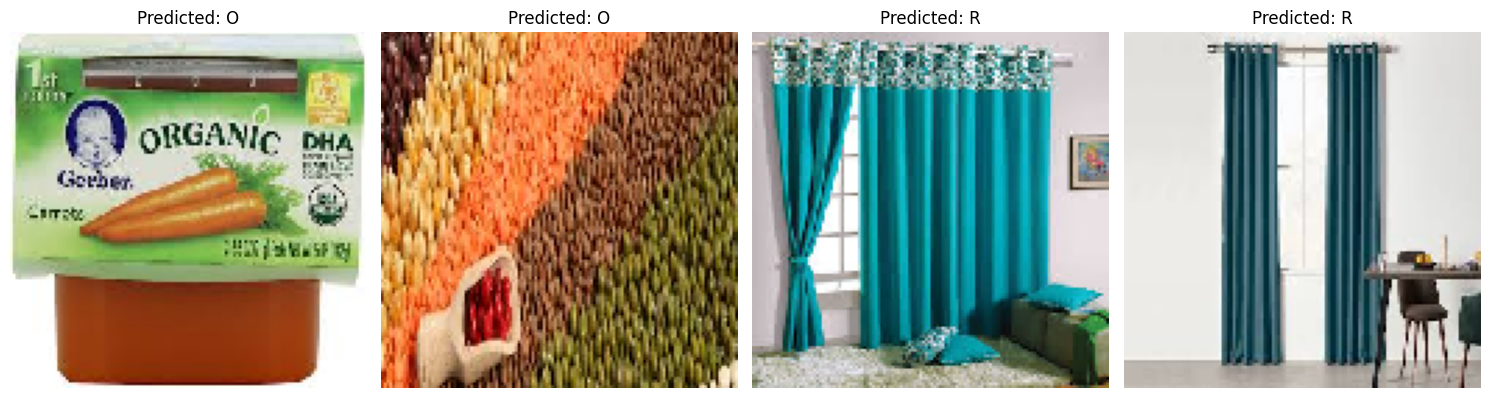

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# List of sample image paths
sample_images = [
    "/content/waste_data/DATASET/TEST/O/O_12738.jpg",
    "/content/waste_data/DATASET/TEST/O/O_13297.jpg",
    "/content/waste_data/DATASET/TEST/R/R_10012.jpg",
    "/content/waste_data/DATASET/TEST/R/R_10025.jpg"
]

plt.figure(figsize=(15, 5))  # width, height

for i, img_path in enumerate(sample_images):
    img = load_img(img_path, target_size=(128, 128))
    img_array = img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)

    # Predict class
    pred = model.predict(img_array_exp)
    class_index = np.argmax(pred)
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[class_index]

    # Plot
    plt.subplot(1, 4, i+1)  # 1 row, 4 columns
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

print(classification_report(y_true, y_pred))


79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 407ms/step
              precision    recall  f1-score   support

           0       0.56      0.66      0.60      1401
           1       0.45      0.35      0.40      1112

    accuracy                           0.52      2513
   macro avg       0.51      0.50      0.50      2513
weighted avg       0.51      0.52      0.51      2513



79/79 ━━━━━━━━━━━━━━━━━━━━ 25s 311ms/step


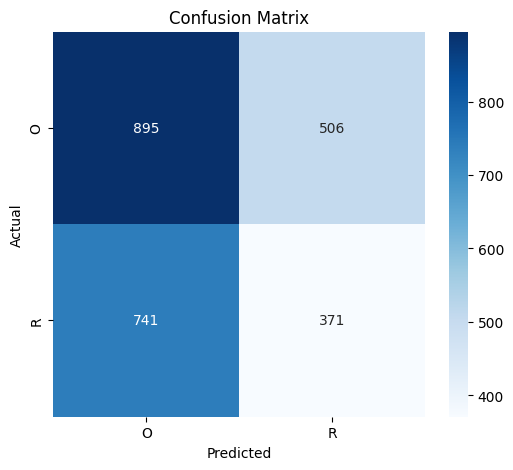

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# True and predicted labels
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
